## Data Mining and Machine Learning
### Clasification using Neural Networks and Deep Learning
#### Edgar Acuna 
#### April 2019

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Example 1. Neural Nets applied to the prediction of the final grade based on the first two exams: E1 and E2

In [2]:
#df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
df=pd.read_csv("c://PW-PR/eje1dis.csv")

In [3]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()
#scaler = StandardScaler()
#scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X1= scaler.transform(X1)

In [4]:
#Training a neural net with one hidden layer containing 5 units
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=99, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [5]:
#Showing  the weights
mlp.coefs_

[array([[-1.93306393e+01, -2.19847626e-02,  4.67280387e+01,
         -1.21251200e+01, -1.67606515e+01],
        [ 9.31589043e+01, -3.73206703e-01,  4.15846672e+01,
         -1.23368759e+01, -3.21037745e+00]]), array([[-7.01419931e-04],
        [ 9.44058482e-01],
        [ 1.10475826e-02],
        [ 1.96857243e+00],
        [-1.35496680e+00]])]

In [6]:
#Showing the biases
mlp.intercepts_

[array([-7.44811572,  0.45692388,  1.39966161, -0.16317004,  0.57152039]),
 array([-51.31888278])]

In [7]:
#Calculating the posterior probabilities
mlp.predict_proba(X1)

array([[0.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [3.10862447e-15, 1.00000000e+00],
       [6.56805055e-10, 9.99999999e-01],
       [1.19992905e-12, 1.00000000e+00],
       [4.33475522e-09, 9.99999996e-01],
       [2.44449664e-08, 9.99999976e-01],
       [1.19239471e-07, 9.99999881e-01],
       [6.26212371e-09, 9.99999994e-01],
       [8.37275879e-04, 9.99162724e-01],
       [1.70068306e-03, 9.98299317e-01],
       [2.60741650e-10, 1.00000000e+00],
       [1.20121468e-10, 1.00000000e+00],
       [3.12620131e-01, 6.87379869e-01],
       [8.63373567e-06, 9.99991366e-01],
       [3.77435916e-06, 9.99996226e-01],
       [2.69701921e-02, 9.73029808e-01],
       [1.20471486e-04, 9.99879529e-01],
       [1.78931027e-01, 8.21068973e-01],
       [2.26344461e-02, 9.77365554e-01],
       [1.69525938e-04, 9.99830474e-01],
       [5.47287861e-07, 9.99999453e-01],
       [9.931020

In [8]:
#Calculating the prediction matrix
pred=mlp.predict(X1)
print(confusion_matrix(y,pred))

[[ 8  0]
 [ 0 24]]


In [9]:
#Calculating the number of errors
error=(y!=pred).sum()
print( "Este es el numero de errores=", error)

Este es el numero de errores= 0


In [10]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           f       1.00      1.00      1.00         8
           p       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



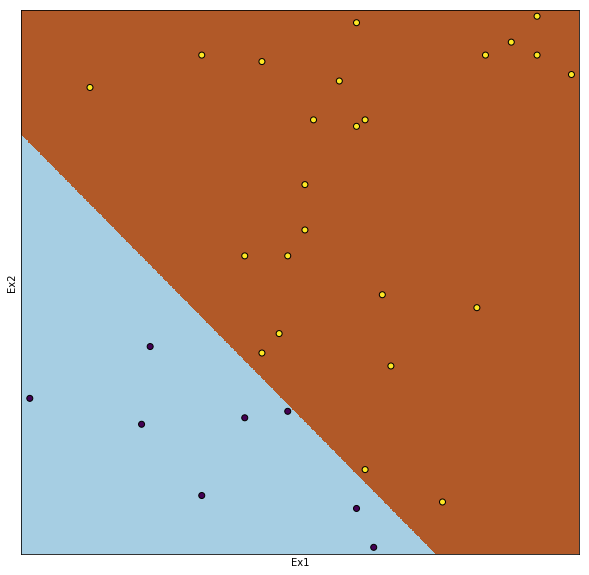

In [11]:
#Visualizando la fromtera de decision
from matplotlib.colors import ListedColormap
mlp = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=mlp.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [12]:
#Training a neural net with two hidden layers containing 5 units each of them
mlp2 = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5,5),max_iter=1000,random_state=99)
mlp2.fit(X1, y) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=99, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
#Showing  the weights
mlp2.coefs_

[array([[-0.23049524, -0.02207448,  0.63049713, -0.64444712,  0.36133947],
        [-0.39755451, -0.37472974, -0.81520733,  1.16250735, -0.9975528 ]]),
 array([[-0.16196165,  0.52198852,  0.36004258, -0.62957092,  0.28294691],
        [-0.44665223,  0.084192  , -0.32181481,  0.48976489,  0.50820058],
        [-0.43132982,  0.14973231, -0.62677501, -0.13685051, -0.6418174 ],
        [-0.55149494, -0.49373762,  0.0625446 , -0.65435683, -0.45661181],
        [-0.76444363,  0.58263972,  0.0809211 , -0.51503376,  0.65182766]]),
 array([[ 0.66983668],
        [-0.0825381 ],
        [ 0.94532955],
        [-0.06752363],
        [-0.30298109]])]

In [14]:
#Showing  the biases
mlp2.intercepts_

[array([ 0.49242105,  0.45692388, -0.22506937, -0.00865967,  0.7918344 ]),
 array([ 0.06520198, -0.71764652,  0.03837523,  0.21710789,  0.4598108 ]),
 array([0.11201181])]

The model has 51 parameters

In [15]:
#Calculating the prediction matrix
pred=mlp2.predict(X1)
print(confusion_matrix(y,pred))

[[ 3  5]
 [ 2 22]]


There are 7 errors

### Example 2. Nnets applied to Diabetes

In [16]:
#url= "http://academic.uprm.edu/eacuna/diabetes.dat"
url="c://PW-PR/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [17]:
y=data['class']
X=data.iloc[:,0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y)
y1=y.as_matrix()
X1=X.as_matrix()
#scaler = StandardScaler()
#scaler.fit(X_train)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X_train= scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [18]:
#training a NN with one hidden layer and 20 units
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
#mlp.coefs_

In [20]:
#mlp.intercepts_

In [21]:
pred=mlp.predict(X_test)

In [22]:
mlp.score(X_test, y_test)

0.7447916666666666

In [23]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.76      0.88      0.82       124
           2       0.69      0.50      0.58        68

   micro avg       0.74      0.74      0.74       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.74      0.74      0.73       192



#### The overfitting problem in Neural Nets 

In [50]:
#Training a NN with one hidden layer and 20 units
mlp1=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=1000)
mlp1.fit(X1, y1) 
mlp1.score(X1, y1)

0.7708333333333334

In [25]:
#Training a NN with one hidden layer and 20 units
mlp2=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),max_iter=1000)
mlp2.fit(X1, y1) 
mlp2.score(X1, y1)

0.7981770833333334

In [26]:
#Training a NN with one hidden layer and 50 units
mlp3=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(50),max_iter=1000)
mlp3.fit(X1, y1) 
mlp3.score(X1, y1)

0.8046875

In [49]:
#Training a NN with one hidden layer and 100 units
mlp4=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(100),max_iter=1000)
mlp4.fit(X1, y1) 
mlp4.score(X1, y1)

0.8671875

In [28]:
#Training a NN with one hidden layer and 200 units
mlp5=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(200),max_iter=5000)
mlp5.fit(X1, y1) 
mlp5.score(X1, y1)

0.9921875

In [29]:
#Training a NN with one hidden layer and 500 units
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(500),max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

1.0

In [30]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty .1
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=.1,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.8229166666666666

In [31]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty 5
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=5,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.7994791666666666

In [32]:
#training a NN with two hidden layer and 20 units in each of them
mlp22=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20),max_iter=5000)
mlp22.fit(X1, y1) 
mlp22.score(X1, y1)

0.8567708333333334

In [33]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp1, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.7240772385509228


In [34]:
#Estimating the accuracy using cross validation(20 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.7460697197539303


In [53]:
#Estimating the accuracy using cross validation(50 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp3, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.7357313738892687


In [54]:
#Estimating the accuracy using cross validation(100 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp4, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.7200786056049215


### Example 3. Nnet  applied to Landsat 

In [57]:
#Cargando el conjunto de datos Landsat
#url='http://academic.uprm.edu/eacuna/landsat.txt'
url='c://PW-PR/landsat.data'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
#Holdout estimacion of teh accuracy  with  3 layers and 50 nuronss in each of them
X_train, X_test, y_train, y_test = train_test_split(X, y)
mlp=MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=500)
mlp.fit(X_train, y_train) 
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [60]:
pred=mlp.predict(X_test)
print(confusion_matrix(y_test, pred))

[[383   1   2   0   4   0]
 [  0 162   0   0   0   1]
 [  2   0 306  28   1  23]
 [  2   3  54  56   2  62]
 [ 11   1   2   0 149   8]
 [  0   2  26  16  21 281]]


In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       390
           2       0.96      0.99      0.98       163
           3       0.78      0.85      0.82       360
           4       0.56      0.31      0.40       179
           5       0.84      0.87      0.86       171
           7       0.75      0.81      0.78       346

   micro avg       0.83      0.83      0.83      1609
   macro avg       0.81      0.80      0.80      1609
weighted avg       0.82      0.83      0.82      1609



### IV. Ejemplo de Deep Learning aplicado a Diabetes

In [64]:
import h2o
h2o.init(ip="localhost", port=54323)
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
#h2o.connect()
#h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54323. connected.


H2O cluster uptime:,5 hours 22 mins
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,3 months and 4 days
H2O cluster name:,H2O_from_python_edgar2017_gwzc6t
H2O cluster total nodes:,1
H2O cluster free memory:,1.584 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [65]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
dl_model = H2ODeepLearningEstimator(hidden=[10,10],epochs=200)
dl_model.train(myx, myy, training_frame=diabetes)

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [66]:
y_pred=dl_model.predict(diabetes)
print( (y_pred['predict']==diabetes['C9']).mean())

deeplearning prediction progress: |███████████████████████████████████████| 100%
[0.8098958333333334]


In [67]:
dl_model.model_performance(diabetes)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.1318145213206079
RMSE: 0.3630626961292056
LogLoss: 0.4038698894039883
Mean Per-Class Error: 0.19762686567164178
AUC: 0.883026119402985
pr_auc: 0.8029396655062471
Gini: 0.7660522388059701
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44036121752012775: 


,1,2,Error,Rate
1,414.0,86.0,0.172,(86.0/500.0)
2,60.0,208.0,0.2239,(60.0/268.0)
Total,474.0,294.0,0.1901,(146.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4403612,0.7402135,187.0
max f2,0.2258397,0.8272667,274.0
max f0point5,0.7407159,0.7429245,92.0
max accuracy,0.5590868,0.8098958,153.0
max precision,0.9992004,1.0,0.0
max recall,0.0100612,1.0,386.0
max specificity,0.9992004,1.0,0.0
max absolute_mcc,0.4403612,0.5923963,187.0
max min_per_class_accuracy,0.4082299,0.79,201.0
max mean_per_class_accuracy,0.3594237,0.8023731,222.0


Gains/Lift Table: Avg response rate: 34.90 %, avg score: 37.47 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9935929,2.8656716,2.8656716,1.0,0.9969018,1.0,0.9969018,0.0298507,0.0298507,186.5671642,186.5671642
,2,0.0208333,0.9906451,2.8656716,2.8656716,1.0,0.9919497,1.0,0.9944258,0.0298507,0.0597015,186.5671642,186.5671642
,3,0.03125,0.9799905,2.8656716,2.8656716,1.0,0.9859181,1.0,0.9915899,0.0298507,0.0895522,186.5671642,186.5671642
,4,0.0403646,0.9652770,2.4562900,2.7732306,0.8571429,0.9718290,0.9677419,0.9871277,0.0223881,0.1119403,145.6289979,177.3230621
,5,0.0507812,0.9568134,2.8656716,2.7921929,1.0,0.9619678,0.9743590,0.9819667,0.0298507,0.1417910,186.5671642,179.2192882
,6,0.1002604,0.8817798,2.5640220,2.6795891,0.8947368,0.9200499,0.9350649,0.9514104,0.1268657,0.2686567,156.4021995,167.9589068
,7,0.1510417,0.8034251,2.4247991,2.5939269,0.8461538,0.8410573,0.9051724,0.9143089,0.1231343,0.3917910,142.4799082,159.3926917
,8,0.2005208,0.7246150,1.7344855,2.3818569,0.6052632,0.7612742,0.8311688,0.8765471,0.0858209,0.4776119,73.4485467,138.1856949
,9,0.3007812,0.5738435,1.6747432,2.1461524,0.5844156,0.6475050,0.7489177,0.8001997,0.1679104,0.6455224,67.4743167,114.6152355
,10,0.3997396,0.4184800,1.3951296,1.9602314,0.4868421,0.4923384,0.6840391,0.7239865,0.1380597,0.7835821,39.5129615,96.0231416


In [69]:
dl_model1 = H2ODeepLearningEstimator(hidden=[20,20,20],epochs=500,nfolds=10)
dl_model1.train(myx, myy, training_frame=diabetes)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [70]:
dl_model1.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1556030189279_177


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.04007000999046607
RMSE: 0.2001749484587571
LogLoss: 0.13035578501037348
Mean Per-Class Error: 0.05092537313432832
AUC: 0.9904701492537314
pr_auc: 0.8190900163776056
Gini: 0.9809402985074629
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6787572484692351: 


,1,2,Error,Rate
1,481.0,19.0,0.038,(19.0/500.0)
2,19.0,249.0,0.0709,(19.0/268.0)
Total,500.0,268.0,0.0495,(38.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6787572,0.9291045,155.0
max f2,0.2473549,0.9546110,203.0
max f0point5,0.8692058,0.9457237,124.0
max accuracy,0.7108938,0.9505208,151.0
max precision,0.9999992,1.0,0.0
max recall,0.0245851,1.0,285.0
max specificity,0.9999992,1.0,0.0
max absolute_mcc,0.6787572,0.8911045,155.0
max min_per_class_accuracy,0.5612397,0.9402985,168.0
max mean_per_class_accuracy,0.4196769,0.9490746,183.0


Gains/Lift Table: Avg response rate: 34.90 %, avg score: 37.54 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,1.0000000,2.8656716,2.8656716,1.0,1.0000000,1.0,1.0000000,0.0298507,0.0298507,186.5671642,186.5671642
,2,0.0208333,1.0000000,2.8656716,2.8656716,1.0,1.0000000,1.0,1.0000000,0.0298507,0.0597015,186.5671642,186.5671642
,3,0.03125,1.0000000,2.8656716,2.8656716,1.0,1.0000000,1.0,1.0000000,0.0298507,0.0895522,186.5671642,186.5671642
,4,0.0403646,0.9999995,2.8656716,2.8656716,1.0,0.9999998,1.0,1.0000000,0.0261194,0.1156716,186.5671642,186.5671642
,5,0.0507812,0.9999970,2.8656716,2.8656716,1.0,0.9999988,1.0,0.9999997,0.0298507,0.1455224,186.5671642,186.5671642
,6,0.1002604,0.9998034,2.8656716,2.8656716,1.0,0.9999380,1.0,0.9999693,0.1417910,0.2873134,186.5671642,186.5671642
,7,0.1510417,0.9982842,2.8656716,2.8656716,1.0,0.9991913,1.0,0.9997077,0.1455224,0.4328358,186.5671642,186.5671642
,8,0.2005208,0.9943498,2.8656716,2.8656716,1.0,0.9964991,1.0,0.9989160,0.1417910,0.5746269,186.5671642,186.5671642
,9,0.3007812,0.8878527,2.6051560,2.7788331,0.9090909,0.9683456,0.9696970,0.9887259,0.2611940,0.8358209,160.5156038,177.8833107
,10,0.3997396,0.3023350,1.4328358,2.4456221,0.5,0.6387442,0.8534202,0.9020855,0.1417910,0.9776119,43.2835821,144.5622053




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.20479737060337302
RMSE: 0.45254543484977616
LogLoss: 0.6392566263634363
Mean Per-Class Error: 0.2914477611940298
AUC: 0.7686007462686567
pr_auc: 0.6259658793292818
Gini: 0.5372014925373134
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46626185912342266: 


,1,2,Error,Rate
1,348.0,152.0,0.304,(152.0/500.0)
2,76.0,192.0,0.2836,(76.0/268.0)
Total,424.0,344.0,0.2969,(228.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4662619,0.6274510,194.0
max f2,0.1497894,0.7574832,315.0
max f0point5,0.6704128,0.6148867,132.0
max accuracy,0.6722274,0.7317708,131.0
max precision,0.9960157,0.9166667,3.0
max recall,0.0242549,1.0,385.0
max specificity,0.9994818,0.998,0.0
max absolute_mcc,0.5898522,0.4057339,157.0
max min_per_class_accuracy,0.4851209,0.7014925,188.0
max mean_per_class_accuracy,0.5161696,0.7085522,176.0


Gains/Lift Table: Avg response rate: 34.90 %, avg score: 44.64 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9976063,2.5074627,2.5074627,0.875,0.9988821,0.875,0.9988821,0.0261194,0.0261194,150.7462687,150.7462687
,2,0.0208333,0.9945723,2.5074627,2.5074627,0.875,0.9960138,0.875,0.9974480,0.0261194,0.0522388,150.7462687,150.7462687
,3,0.03125,0.9885229,2.5074627,2.5074627,0.875,0.9914667,0.875,0.9954542,0.0261194,0.0783582,150.7462687,150.7462687
,4,0.0403646,0.9827184,2.0469083,2.4034665,0.7142857,0.9853992,0.8387097,0.9931837,0.0186567,0.0970149,104.6908316,140.3466538
,5,0.0507812,0.9767499,2.1492537,2.3513203,0.75,0.9799981,0.8205128,0.9904790,0.0223881,0.1194030,114.9253731,135.1320321
,6,0.1002604,0.9479819,1.8853103,2.1213413,0.6578947,0.9628919,0.7402597,0.9768646,0.0932836,0.2126866,88.5310291,112.1341345
,7,0.1510417,0.8779989,1.6165327,1.9516212,0.5641026,0.9184726,0.6810345,0.9572328,0.0820896,0.2947761,61.6532721,95.1621204
,8,0.2005208,0.8184740,1.9607227,1.9538670,0.6842105,0.8459221,0.6818182,0.9297665,0.0970149,0.3917910,96.0722702,95.3867028
,9,0.3007812,0.6868366,1.5258771,1.8112037,0.5324675,0.7481042,0.6320346,0.8692124,0.1529851,0.5447761,52.5877108,81.1203722
,10,0.3997396,0.5225621,1.2065986,1.6615295,0.4210526,0.6125569,0.5798046,0.8056755,0.1194030,0.6641791,20.6598586,66.1529486



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
accuracy,0.7183492,0.0826223,0.76,0.7582418,0.7432432,0.6666667,0.6582279,0.7849463,0.4029851,0.8253968,0.7837838,0.8
auc,0.7729259,0.0479610,0.8273156,0.8207942,0.7655172,0.7903846,0.7576197,0.8248804,0.5842593,0.7583121,0.8095238,0.7906517
err,0.2816509,0.0826223,0.24,0.2417582,0.2567567,0.3333333,0.3417721,0.2150538,0.5970149,0.1746032,0.2162162,0.2
err_count,21.3,5.3390074,18.0,22.0,19.0,24.0,27.0,20.0,40.0,11.0,16.0,16.0
f0point5,0.6243012,0.0653106,0.6470588,0.6530612,0.6629834,0.4941860,0.5373832,0.7323232,0.4576271,0.7017544,0.620438,0.7361963
f1,0.6727276,0.0473298,0.7096774,0.7441860,0.7164179,0.5862069,0.6301370,0.7435898,0.5744681,0.5925926,0.68,0.75
f2,0.7467729,0.0604913,0.7857143,0.8648649,0.7792208,0.720339,0.7615894,0.7552083,0.7714286,0.5128205,0.7522124,0.7643312
lift_top_group,2.7124195,0.707985,2.8846154,2.7575758,2.5517242,3.6,3.0384614,0.0,2.4814816,3.7058823,3.5238094,2.580645
logloss,0.6412017,0.0716988,0.5445455,0.5497806,0.6369638,0.8288559,0.5711256,0.7244759,0.7938169,0.603239,0.5261444,0.6330693
max_per_class_error,0.4034046,0.1563544,0.2857143,0.3620690,0.3111111,0.4038461,0.4528302,0.2368421,1.0,0.5294118,0.2264151,0.2258064


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-04-23 16:01:03,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-04-23 16:01:03,22.744 sec,121904 obs/sec,10.0,1,7680.0,0.3861112,0.4531373,0.3437906,0.8507687,0.7582439,2.8656716,0.2356771
,2019-04-23 16:01:06,25.536 sec,144212 obs/sec,510.0,51,391680.0,0.2001749,0.1303558,0.8236250,0.9904701,0.8190900,2.8656716,0.0494792


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C7,1.0,1.0,0.1388296
C6,0.9757255,0.9757255,0.1354596
C3,0.9352985,0.9352985,0.1298471
C5,0.9141937,0.9141937,0.1269171
C4,0.8967770,0.8967770,0.1244992
C1,0.8952525,0.8952525,0.1242875
C8,0.8842649,0.8842649,0.1227621
C2,0.7015628,0.7015628,0.0973977


<bound method H2OBinomialModel.confusion_matrix of >

### V . Ejemplo de deep Learning aplicado a Shuttle

In [ ]:
shuttle = h2o.import_file("https://academic.uprm.edu/eacuna/shuttle.trn")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9']
shuttle['C10']=shuttle['C10'].asfactor()
myy="C10"
dl_model = H2ODeepLearningEstimator(hidden=[10,20],epochs=200,nfolds=10)
dl_model.train(myx, myy, training_frame=shuttle)

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████

In [46]:
y_pred=dl_model.predict(shuttle)
print ((y_pred['predict']==shuttle['C10']).mean())

deeplearning prediction progress: |███████████████████████████████████████| 100%
[0.9994022988505747]


In [ ]:
dl_model.model_performance(shuttle)

In [48]:
dl_model.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1556030189279_80


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.0006590835325818469
RMSE: 0.025672622238132336
LogLoss: 0.014769974246377996
Mean Per-Class Error: 0.005736101600529597
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,7,Error,Rate
7850.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0001274,"1 / 7,851"
0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 3
0.0,0.0,27.0,0.0,1.0,0.0,0.0,0.0357143,1 / 28
1.0,1.0,1.0,1574.0,0.0,1.0,0.0,0.0025349,"4 / 1,578"
0.0,1.0,0.0,0.0,562.0,0.0,0.0,0.0017762,1 / 563
0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0 / 1
0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0 / 1
7851.0,6.0,28.0,1574.0,563.0,2.0,1.0,0.0006983,"7 / 10,025"


Top-7 Hit Ratios: 


k,hit_ratio
1,0.9993017
2,0.9995012
3,0.9997007
4,1.0
5,1.0
6,1.0
7,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error
,2019-04-23 10:37:20,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan
,2019-04-23 10:37:20,0.687 sec,181778 obs/sec,2.2983448,1,99978.0,0.0737521,0.0468684,0.9970396,0.0052868
,2019-04-23 10:37:25,5.699 sec,198739 obs/sec,25.2878621,11,1100022.0,0.0351314,0.0184253,0.9993283,0.0012968
,2019-04-23 10:37:31,11.352 sec,197528 obs/sec,50.5762989,22,2200069.0,0.0296272,0.0159970,0.9995223,0.0009975
,2019-04-23 10:37:36,16.547 sec,202347 obs/sec,75.8780690,33,3300696.0,0.0273630,0.0151074,0.9995925,0.0007980
,2019-04-23 10:37:42,21.850 sec,203762 obs/sec,101.1597011,44,4400447.0,0.0289132,0.0168791,0.9995450,0.0008978
,2019-04-23 10:37:47,27.035 sec,201882 obs/sec,124.1600920,54,5400964.0,0.0293062,0.0188461,0.9995326,0.0009975
,2019-04-23 10:37:52,32.419 sec,199308 obs/sec,147.1492874,64,6400994.0,0.0274724,0.0180127,0.9995892,0.0007980
,2019-04-23 10:37:58,37.870 sec,199778 obs/sec,172.4385977,75,7501079.0,0.0265399,0.0160636,0.9996166,0.0006983
,2019-04-23 10:38:03,42.943 sec,199566 obs/sec,195.4192644,85,8500738.0,0.0256726,0.0147700,0.9996413,0.0006983


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C2,1.0,1.0,0.2115230
C5,0.6319591,0.6319591,0.1336739
C7,0.6110241,0.6110241,0.1292457
C1,0.5698003,0.5698003,0.1205259
C8,0.4586450,0.4586450,0.0970140
C9,0.4064629,0.4064629,0.0859762
C4,0.3580578,0.3580578,0.0757375
C6,0.3488592,0.3488592,0.0737917
C3,0.3428099,0.3428099,0.0725122


<bound method H2OMultinomialModel.confusion_matrix of >